In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Load the dataset from Yahoo Finance
ticker = 'AAPL'  # Apple Inc AAPL
data = yf.download(ticker, start='2021-01-01', end='2024-07-01')

/tmp/ipython-input-16308145.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2021-01-01', end='2024-07-01')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,125.974495,130.062993,123.394844,129.975385,143301900
2021-01-05,127.531967,128.242598,125.020459,125.468253,97664900
2021-01-06,123.239059,127.570927,123.024899,124.329329,155088000
2021-01-07,127.444397,128.135555,124.465635,124.952361,109578200
2021-01-08,128.544342,129.108946,126.772652,128.914244,105158200
...,...,...,...,...,...
2024-06-24,206.735870,211.265106,205.196324,206.318706,80727000
2024-06-25,207.659607,209.954021,207.202703,207.739054,55549700


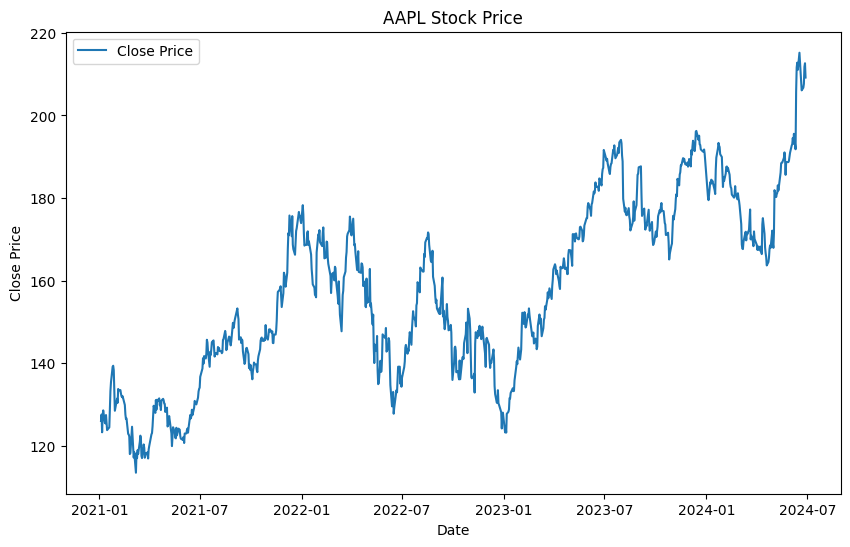

In [ ]:
df = data[['Close']]
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# ARIMA Model
# Define the model
model = ARIMA(df['Close'].dropna(), order=(5, 1, 1))
# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  877
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -2094.091
Date:                Thu, 13 Nov 2025   AIC                           4202.182
Time:                        13:24:56   BIC                           4235.609
Sample:                             0   HQIC                          4214.968
                                - 877                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0081      6.607      0.001      0.999     -12.942      12.958
ar.L2         -0.0462      0.115     -0.402      0.688      -0.271       0.179
ar.L3         -0.0151      0.308     -0.049      0.9

## Exercise: Display forcast for next 30, 60, 90 days and post in discussions

In [ ]:
from sklearn.metrics import mean_squared_error
train_data, test_data = data[0:int(len(df)*0.7)], data[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 6.245043499874408


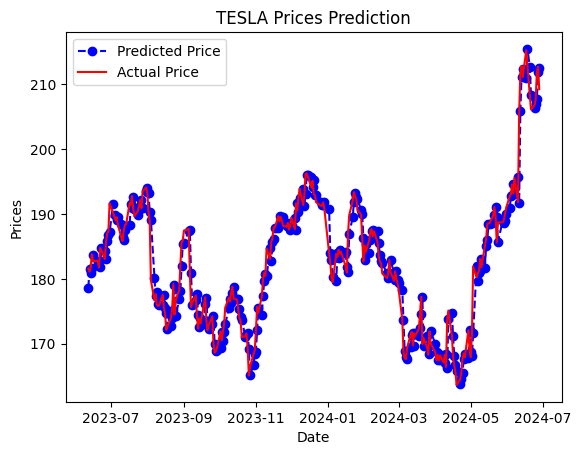

In [ ]:
import numpy as np
test_set_range = data[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()


In [ ]:
forecast_steps = 300
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='B')[1:]  # 'B' for business days



# Correcting the combination of forecast values and dates
forecast_combined = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast
})

print(forecast_combined)

          Date    Forecast
0   2024-07-01  212.479722
1   2024-07-02  212.388295
2   2024-07-03  212.413282
3   2024-07-04  212.426427
4   2024-07-05  212.425538
..         ...         ...
295 2025-08-18  212.424110
296 2025-08-19  212.424110
297 2025-08-20  212.424110
298 2025-08-21  212.424110
299 2025-08-22  212.424110

[300 rows x 2 columns]


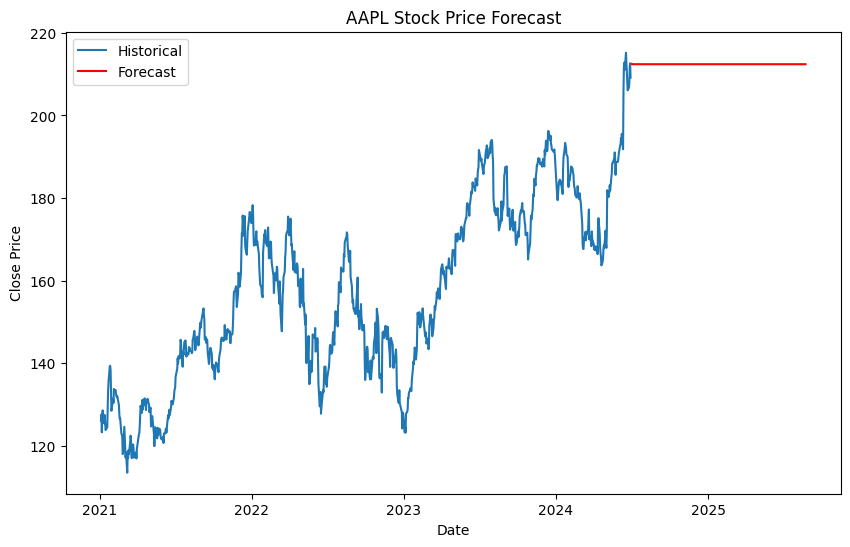

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Historical')
plt.plot(forecast_combined['Date'], forecast_combined['Forecast'], label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

/tmp/ipython-input-1150978498.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2020-01', periods=24, freq='M'),


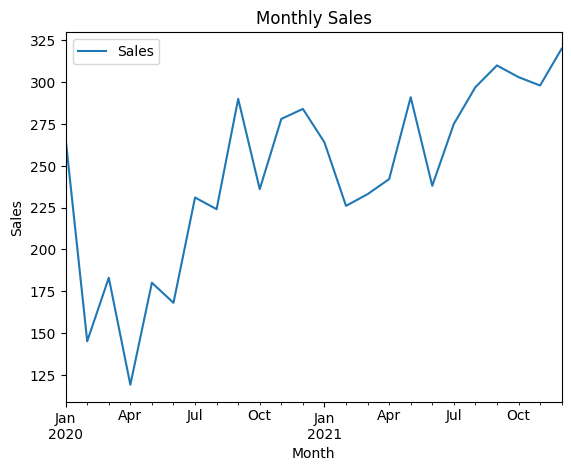

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample time series data (e.g., monthly sales)
data = {
    'Month': pd.date_range(start='2020-01', periods=24, freq='M'),
    'Sales': [266, 145, 183, 119, 180, 168, 231, 224, 290, 236, 278, 284,
              264, 226, 233, 242, 291, 238, 275, 297, 310, 303, 298, 320]
}

df = pd.DataFrame(data).set_index('Month')

# Plot the time series
df.plot(title='Monthly Sales')
plt.ylabel('Sales')
plt.show()


In [ ]:
# Fit ARIMA(p=1, d=1, q=1)
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Print summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -113.969
Date:                Thu, 13 Nov 2025   AIC                            233.938
Time:                        13:26:30   BIC                            237.344
Sample:                    01-31-2020   HQIC                           234.794
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9699      0.039    -24.635      0.000      -1.047      -0.893
ma.L1          0.6846      0.207      3.311      0.001       0.279       1.090
sigma2      1116.9570    444.499      2.513      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Forecast:
 2022-01-31    318.013107
2022-02-28    319.940196
2022-03-31    318.071111
2022-04-30    319.883937
2022-05-31    318.125676
2022-06-30    319.831015
2022-07-31    318.177005
2022-08-31    319.781230
2022-09-30    318.225291
2022-10-31    319.734397
2022-11-30    318.270715
2022-12-31    319.690341
2023-01-31    318.313445
2023-02-28    319.648898
2023-03-31    318.353641
2023-04-30    319.609911
2023-05-31    318.391454
2023-06-30    319.573236
2023-07-31    318.427025
2023-08-31    319.538736
Freq: ME, Name: predicted_mean, dtype: float64


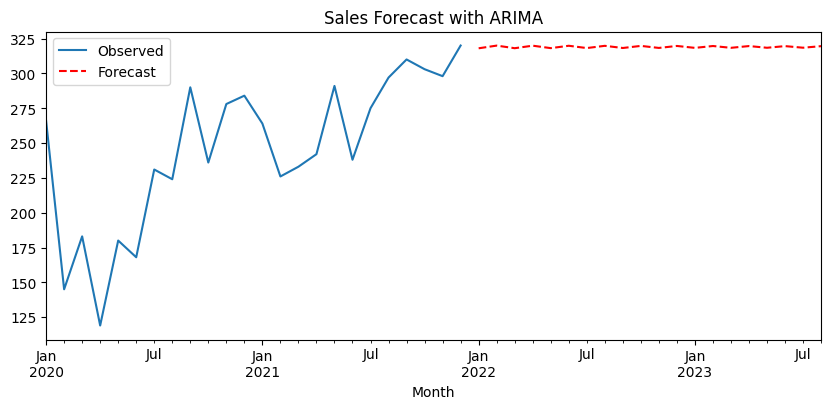

In [ ]:
# Forecast 20 future points
forecast = model_fit.forecast(steps=20)
print("Forecast:\n", forecast)

# Plot
df['Sales'].plot(label='Observed', figsize=(10, 4))
forecast.plot(label='Forecast', style='--', color='red')
plt.legend()
plt.title('Sales Forecast with ARIMA')
plt.show()


## Text analysis

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
text = """
Natural Language Processing (NLP) is a field of artificial intelligence
that focuses on the random and dummy interaction between computers and stupid humans through
natural language. The ultimate objective of NLP is to read, decipher, understand, and make sense of stupid human languages in a valuable way.
Most NLP techniques rely on machine learning to derive meaning from
human languages.
"""

## Tokenization
Tokenize the sample text into words and sentences.

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
word_tokens = word_tokenize(text)
sentence_tokens = sent_tokenize(text)

In [ ]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words and word.isalnum()]

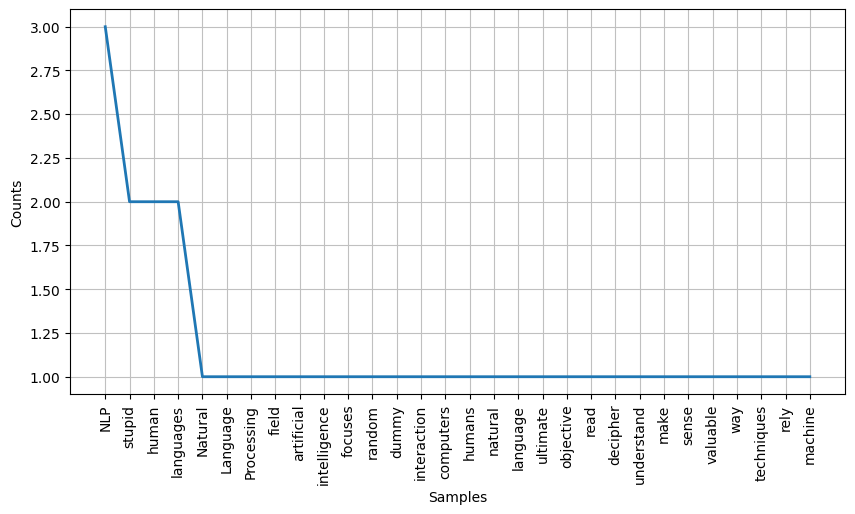

In [ ]:
fdist = FreqDist(filtered_words)

plt.figure(figsize=(10, 5))
fdist.plot(30, cumulative=False)
plt.show()

In [ ]:
blob = TextBlob(text)
sentiment = blob.sentiment

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

## Perform named entity recognition (NER) to identify entities like names, organizations, etc., in the text.

In [ ]:
def named_entity_recognition(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    entities = nltk.chunk.ne_chunk(tagged)
    return entities

entities = named_entity_recognition(text)

In [ ]:
print("Word Tokens:", word_tokens)
print("Sentence Tokens:", sentence_tokens)
print("Filtered Words:", filtered_words)
print("Word Frequency Distribution:", fdist)
print("Sentiment Analysis:", sentiment)
print("Named Entities:")
entities.pprint()

Word Tokens: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'random', 'and', 'dummy', 'interaction', 'between', 'computers', 'and', 'stupid', 'humans', 'through', 'natural', 'language', '.', 'The', 'ultimate', 'objective', 'of', 'NLP', 'is', 'to', 'read', ',', 'decipher', ',', 'understand', ',', 'and', 'make', 'sense', 'of', 'stupid', 'human', 'languages', 'in', 'a', 'valuable', 'way', '.', 'Most', 'NLP', 'techniques', 'rely', 'on', 'machine', 'learning', 'to', 'derive', 'meaning', 'from', 'human', 'languages', '.']
Sentence Tokens: ['\nNatural Language Processing (NLP) is a field of artificial intelligence\nthat focuses on the random and dummy interaction between computers and stupid humans through\nnatural language.', 'The ultimate objective of NLP is to read, decipher, understand, and make sense of stupid human languages in a valuable way.', 'Most NLP techniques rely on machine learning t

Polarity = 0.0125
Range: -1.0 (very negative) to +1.0 (very positive)

Meaning: A polarity of 0.0125 is almost neutral, but slightly positive.

It suggests that the text has a very weak positive sentiment.

Subjectivity = 0.45
Range: 0.0 (completely objective) to 1.0 (completely subjective)

Meaning: A subjectivity of 0.45 indicates the text is moderately objective with a slight lean toward subjectivity.

It suggests some personal opinion or feeling may be present, but not strongly so.

## Change text to vary sentiment polarity and post results on discussions